# Temperature Forecost Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

importing all the lybraries such as pandas,numpy,seaborn,matplot and warnings

In [2]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Loading the dataset from my jupyter notebook

# Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [3]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

So many null values are present in the dataset , we need to remove it

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


there are 25 columns and 7752 rows are present

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

the columns present in the dataset

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

2 types of present they are float and object datatypes

<AxesSubplot:>

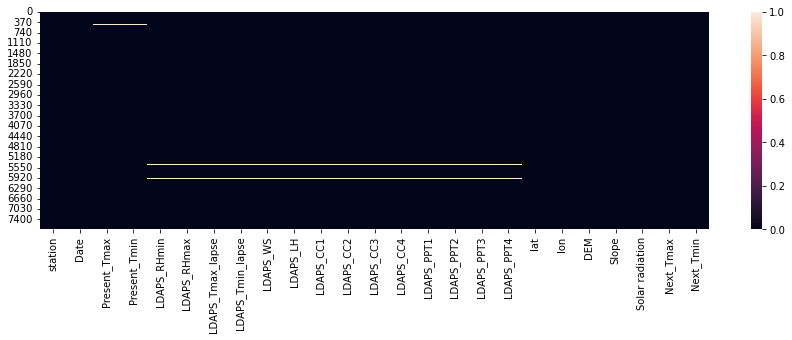

In [7]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull())

using heatmap to check the null values

In [8]:
df.dropna(axis=0,inplace=True)

dropping the null values, using pandas drop function

In [9]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

there is no null value present in the dataset

In [10]:
for i in df.columns:
    print('>================================>','\n',
          i,'\n',
          '>===============================>',
          '\n',df[i].value_counts())

>================================> 
 station 
 >===============================> 
 25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64
>================================> 
 Date 
 >===============================> 
 30-06-2013    25
23-07-2016    25
22-08-2015    25
23-08-2015    25
24-08-2015    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64
>================================> 
 Present_Tmax 
 >===============================> 
 31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64
>=================

checking the value counts in the each columns

In [11]:
df['Slope'].value_counts()

0.2713    307
5.1782    307
0.1554    307
1.2313    307
0.6970    307
0.5141    307
0.2661    306
2.5348    306
2.6865    305
2.2579    304
4.7296    304
0.5721    304
0.6180    303
2.7850    303
0.4125    302
0.5931    302
0.8552    302
1.7678    302
0.1332    302
0.2223    302
0.6233    301
0.0985    301
0.1457    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64

the value counts of slope column

In [12]:
print(df['station'].value_counts())

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64


types of number values present in the station column

In [13]:
df['Next_Tmax'].value_counts()

29.3    113
33.0    104
31.3    100
29.6     98
31.2     97
       ... 
37.5      1
38.7      1
37.4      1
20.9      1
17.4      1
Name: Next_Tmax, Length: 181, dtype: int64

there are so many unique values present in the Next_Tmax column

In [14]:
df['Next_Tmin'].value_counts()

23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
29.8      1
28.5      1
29.1      1
29.4      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

Next_Tmin column also has so many unique values

In [15]:
for i in df.columns:
    print(df[i].unique)

<bound method Series.unique of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7745    21.0
7746    22.0
7747    23.0
7748    24.0
7749    25.0
Name: station, Length: 7588, dtype: float64>
<bound method Series.unique of 0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7745    30-08-2017
7746    30-08-2017
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
Name: Date, Length: 7588, dtype: object>
<bound method Series.unique of 0       28.7
1       31.9
2       31.6
3       32.0
4       31.4
        ... 
7745    23.1
7746    22.5
7747    23.3
7748    23.3
7749    23.2
Name: Present_Tmax, Length: 7588, dtype: float64>
<bound method Series.unique of 0       21.4
1       21.6
2       23.3
3       23.4
4       21.9
        ... 
7745    17.8
7746    17.4
7747    17.1
7748    17.7
7749    17.4
Name: Present_Tmin, Length: 7588, dtype: float64>
<bound method Series.unique of 0       58.255688
1  

Number of unique values present in the dataset

# EDA

<AxesSubplot:xlabel='station', ylabel='count'>

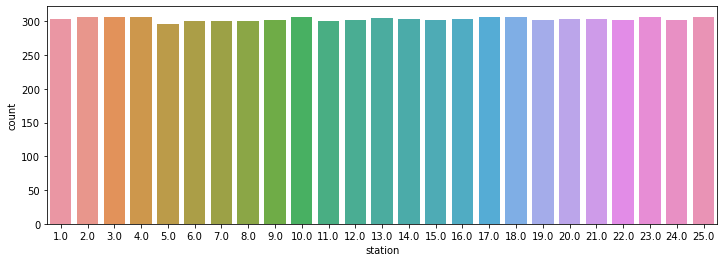

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(df['station'])

station counts 

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

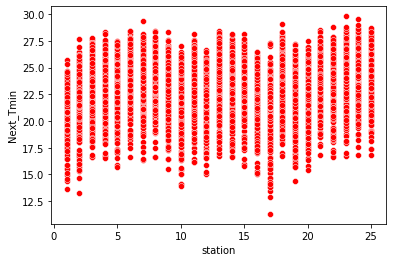

In [17]:
sns.scatterplot(x='station',y='Next_Tmin',data=df,color='r')

some stations has high temperature on Next day

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

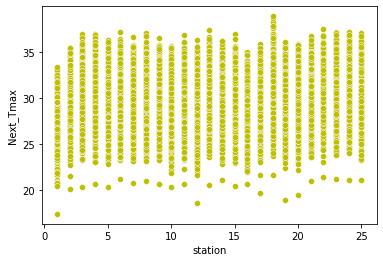

In [18]:
sns.scatterplot(x='station',y='Next_Tmax',data=df,color='y')

except station 1, all the stations are having high temperature on next day

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

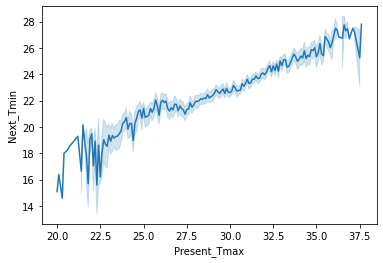

In [19]:
sns.lineplot(x='Present_Tmax',y='Next_Tmin',data=df)

as the present day temperature is less then the Next day temperature also less

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

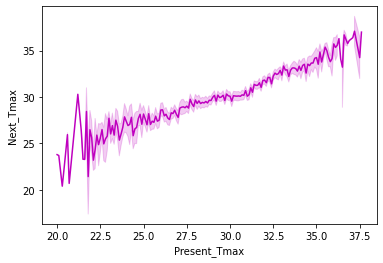

In [20]:
sns.lineplot(x='Present_Tmax',y='Next_Tmax',data=df,color='m')

if the present day temperature increses then next day temperature is also very high

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

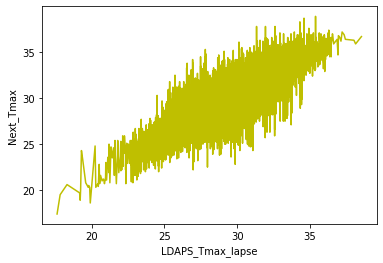

In [21]:
sns.lineplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df,color='y')

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

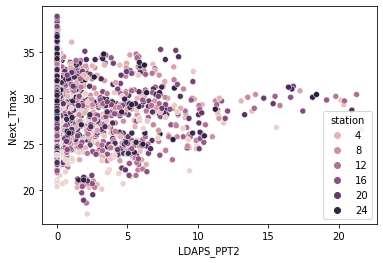

In [22]:
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmax',hue='station',data=df)

as the LDAPS_PPT2 value is increses then next day the temperature decreses

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

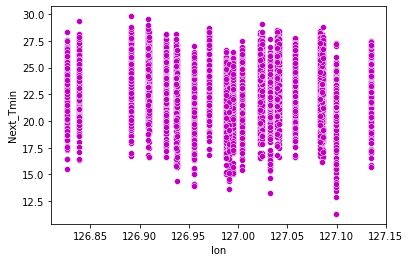

In [23]:
sns.scatterplot(x='lon',y='Next_Tmin',data=df,color='m')

as the Longitude increses the temperature is less in that area

<AxesSubplot:xlabel='Next_Tmax', ylabel='Slope'>

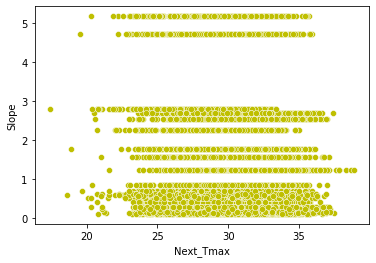

In [24]:
sns.scatterplot(x='Next_Tmax',y='Slope',data=df,color='y')

if the slope increses then automitacally the temperature also increses

<AxesSubplot:xlabel='station', ylabel='Solar radiation'>

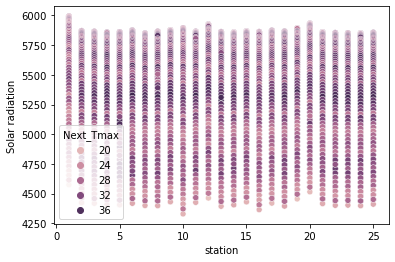

In [25]:
sns.scatterplot(hue='Next_Tmax',y='Solar radiation',x='station',data=df)

Saloar radiations for the Next day if at high temperature

<AxesSubplot:xlabel='lat', ylabel='Solar radiation'>

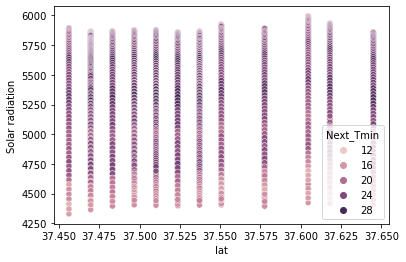

In [26]:
sns.scatterplot(hue='Next_Tmin',x='lat',y='Solar radiation',data=df)

Solar radiations at lattitude for the next day with minimum temperature

In [27]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


# Statical anlysis

* Total 7588 rows and 24 columns present in the dataset
* the Median is greater than mean there is left skewed data is there ne need normalize the data
* the standard deviations in some columns are more than 3, means outliers are present we need to clean it...
* some columns like LDAPS_LH,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 columns has only max values and there is no 25th,50th and 75th percentile 
 means outliers are very high, we need to remove it

In [28]:
df.drop(['LDAPS_PPT3','LDAPS_PPT4','LDAPS_PPT2'],axis=1,inplace=True)

we removed aboue columns beacuse outliers very high in these columns

In [29]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.000161,0.005005,-0.001954,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.146391,-0.143069,-0.114917,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.004719,-0.046694,0.111577,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.688069,0.513937,0.259039,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.224734,0.127242,0.268019,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.542728,-0.429739,-0.115659,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.044998,-0.079536,0.034956,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.238155,0.218870,0.141503,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.246709,-0.173156,-0.018708,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.516698,0.362670,0.446930,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

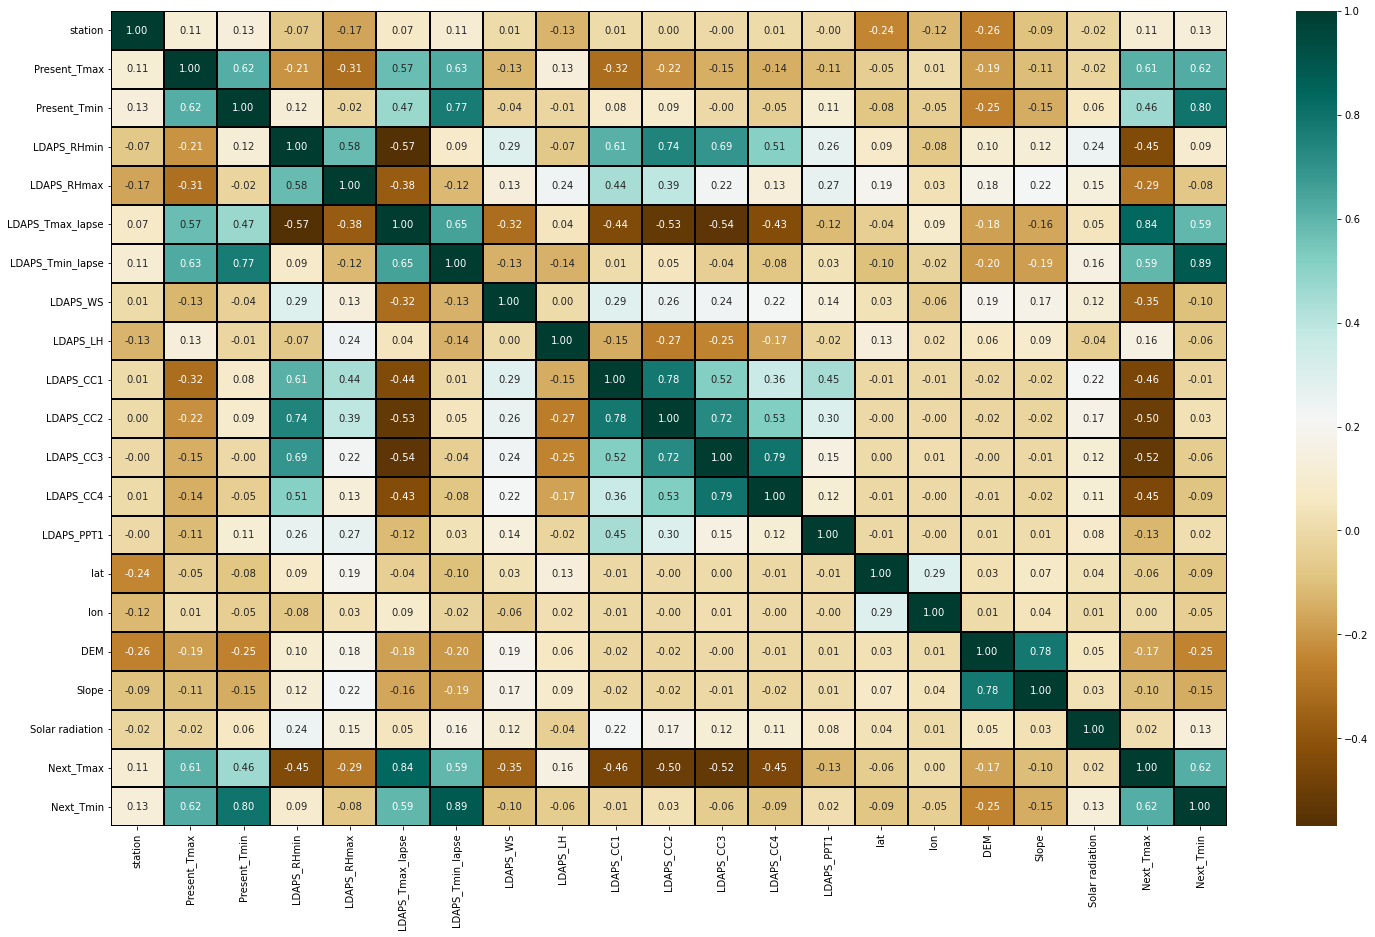

In [30]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=0.2,fmt='0.2f',cmap='BrBG')

# coreletion of the columns with respect to Next_Tmin and Next_Tmax

* LDAPS_Tmin_Lapse,Present are highly positive co reletion with Next day minimum temperature
* LDAPS_CC3,CC2,CC4 columns are highly Negative co reletion with Next day maximum temperature
* LDAPS_Tmax_lapse,present Tmax columns highly positive co reletion with next day maximun temperature
* DEM column is highly negitive co reletion with respect to next day minimum temperarure

In [31]:
df['Date']=pd.to_datetime(df['Date'])

changing the Date column object to Date format

In [32]:
df.set_index('Date',inplace=True)

setting the Date column as index column

In [33]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,1.616969e-01,0.130928,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.000000e+00,0.004380,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
2017-08-30,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
2017-08-30,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1


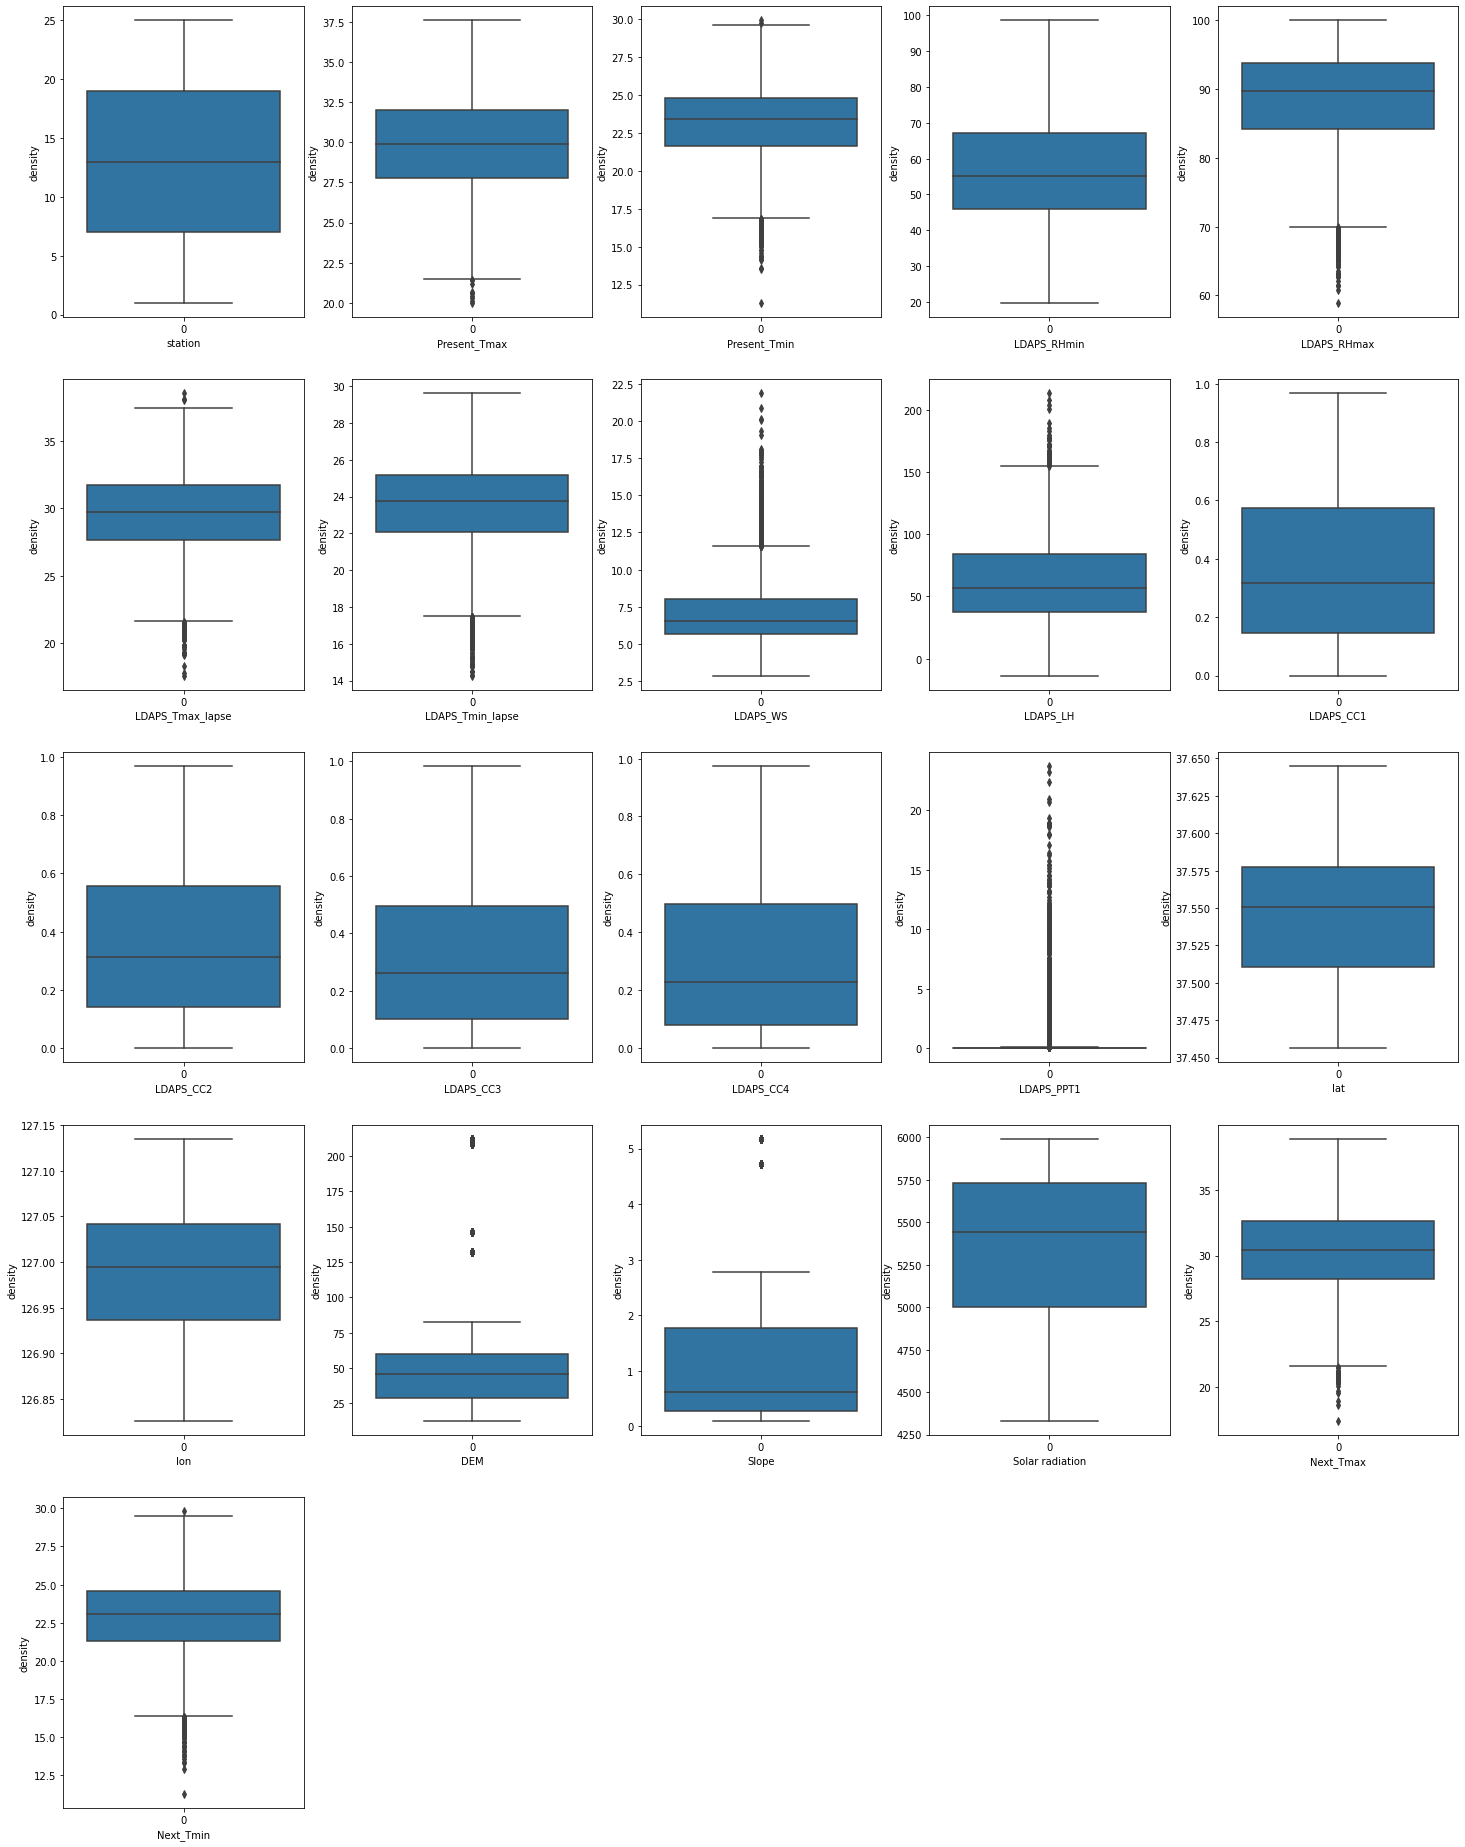

In [34]:
plt.figure(figsize=(25,40))
p=1

for i in df.columns:
    if p<35:
        plt.subplot(6,5,p)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
        plt.ylabel('density')
    p+=1
plt.show()

In [35]:
df.drop(['LDAPS_PPT1'],axis=1,inplace=True)

dropping LDAPS_PPT1 column beacuse its show so much of outliers

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.664607,0.353318,0.748029,0.104660,0.382768,0.525269,0.215525,0.126423,0.206603,0.513123,0.587938,0.623854,0.660441,1.186076,0.005302,2.769091,1.111162,1.510565,0.366861,0.689265
2013-06-30,1.526052,0.725138,0.664721,0.305052,0.311697,0.078334,0.223368,0.644133,0.313359,0.545304,0.402304,0.632872,0.673074,1.186076,0.512280,0.315828,0.543220,1.222997,0.083068,0.165513
2013-06-30,1.387498,0.624033,0.043400,0.549344,0.609425,0.160080,0.449896,0.439100,1.244497,0.606944,0.380211,0.454151,0.616249,0.650626,0.840503,0.526719,0.723891,1.209602,0.275895,0.398527
2013-06-30,1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,0.079238,0.663353,0.096026,0.580143,0.502221,0.626014,0.647336,1.987268,0.386040,0.298272,0.928888,1.194265,0.468721,0.559681
2013-06-30,1.110389,0.556630,0.539758,0.037665,0.249244,0.171981,0.010803,0.624327,1.349989,0.827872,0.409191,0.555021,0.506152,0.117159,1.812547,0.494848,0.549485,1.200286,0.308032,0.165513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,1.106481,2.240616,2.247578,2.190405,1.402898,0.614083,2.223667,0.225479,1.569844,1.203497,1.261546,1.271117,1.159890,0.117159,0.613271,0.655747,0.500966,2.065599,0.848928,2.099366
2017-08-30,1.245036,2.442826,2.414195,1.820788,0.648815,0.990460,2.432415,0.609132,0.583486,1.151793,1.283455,1.271114,1.107407,0.686016,1.193973,0.735482,0.820711,2.098689,0.720377,2.341098
2017-08-30,1.383590,2.173212,2.539157,2.050081,1.318376,1.110333,2.021883,0.434188,0.283984,1.290699,1.064318,1.271117,1.177177,0.150566,1.267697,0.852919,0.804538,2.095175,0.623964,1.938212


Using Zscore method to remove the outliers

In [37]:
threshold=3
print(np.where(z>3))

(array([  25,   33,   44,  175,  194,  268,  292,  341,  372,  391,  416,
        489,  514,  539,  564,  570,  579,  589,  958, 1454, 1612, 1621,
       1623, 1624, 1630, 1634, 1738, 1739, 1741, 1751, 1754, 2135, 2136,
       2137, 2138, 2139, 2139, 2140, 2141, 2141, 2142, 2143, 2144, 2145,
       2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156,
       2157, 2158, 2159, 2313, 2314, 2316, 2329, 2335, 2338, 2354, 2401,
       2486, 2502, 2527, 2633, 2708, 2733, 3061, 3073, 3123, 3141, 3147,
       3148, 3148, 3159, 3166, 3168, 3172, 3173, 3177, 3181, 3218, 3220,
       3221, 3223, 3225, 3229, 3230, 3243, 3246, 3255, 3332, 3335, 3350,
       3356, 3360, 3362, 3363, 3364, 3365, 3367, 3369, 3375, 3397, 3410,
       3422, 3431, 3433, 3434, 3435, 3436, 3437, 3438, 3438, 3439, 3440,
       3441, 3442, 3442, 3443, 3444, 3444, 3445, 3447, 3449, 3450, 3451,
       3453, 3454, 3455, 3481, 3672, 3892, 3898, 3917, 4415, 4416, 4418,
       4424, 4434, 4492, 4504, 4506, 4531, 4683, 4

Setting the threshold to 3

In [38]:
df1=df[(z<3).all(axis=1)]

In [39]:
print(df1.shape)
print(df.shape)

(7313, 20)
(7588, 20)


now we can the outliers are removed from the dataset

In [40]:
print('Percentage of data loss',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Percentage of data loss 3.624143384290986


In [41]:
df1.skew()

station             0.000561
Present_Tmax       -0.218955
Present_Tmin       -0.204771
LDAPS_RHmin         0.282072
LDAPS_RHmax        -0.753149
LDAPS_Tmax_lapse   -0.094445
LDAPS_Tmin_lapse   -0.360139
LDAPS_WS            1.017298
LDAPS_LH            0.595527
LDAPS_CC1           0.479447
LDAPS_CC2           0.470163
LDAPS_CC3           0.635937
LDAPS_CC4           0.670096
lat                 0.105239
lon                -0.289089
DEM                 1.776824
Slope               1.598635
Solar radiation    -0.516509
Next_Tmax          -0.261221
Next_Tmin          -0.211997
dtype: float64

the skewness of the all the columns are in range 

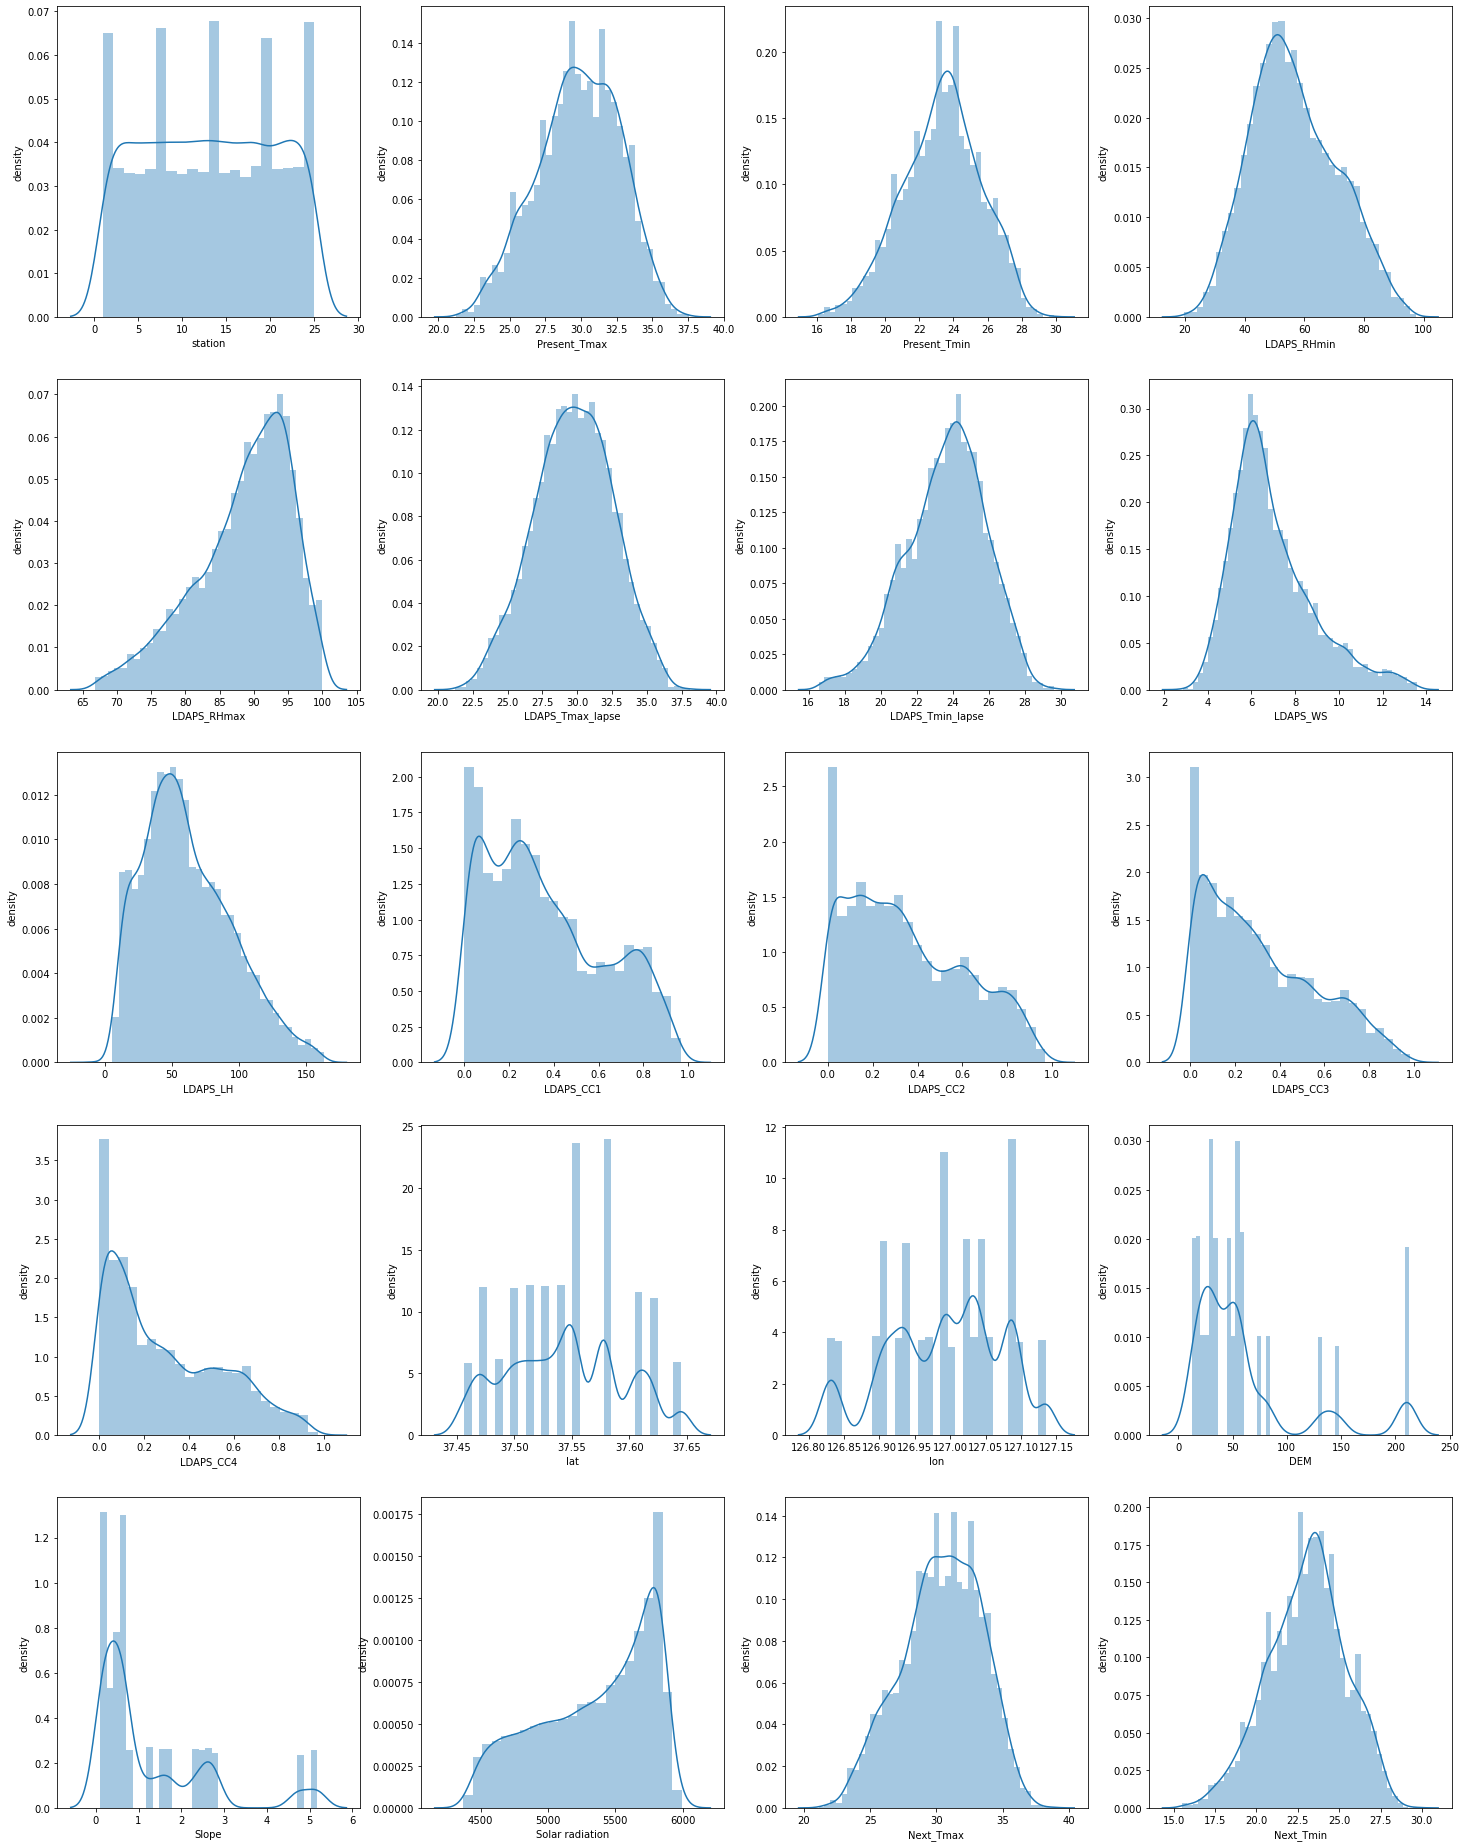

In [42]:
plt.figure(figsize=(25,40))
p=1

for i in df1.columns:
    if p<35:
        plt.subplot(6,4,p)
        sns.distplot(df1[i])
        plt.xlabel(i)
        plt.ylabel('density')
    p+=1
plt.show()

we can see the skewness of each columns

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df1=pd.DataFrame(sc.fit_transform(df1),columns=df1.columns)
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.669951,-0.381241,-0.824226,0.106467,0.378876,-0.591723,-0.284713,-0.065488,0.233698,-0.505502,-0.586454,-0.621662,-0.661954,1.210119,-0.005908,2.838022,1.147803,1.526954,-0.426463,-0.784985
1,-1.531223,0.723620,-0.737318,-0.309475,0.305131,0.036734,0.182412,-0.665114,-0.299922,-0.537753,-0.399671,-0.630802,-0.674701,1.210119,0.510421,-0.302404,-0.534179,1.233681,0.039993,-0.229855
2,-1.392495,0.620039,0.001402,-0.557482,-0.650637,0.121846,0.423511,-0.427639,-1.255519,-0.599526,-0.377440,-0.449652,-0.617368,0.670742,0.837849,-0.517090,-0.717864,1.220020,0.239902,0.367977
3,-1.253767,0.758147,0.044856,0.105364,1.152487,-0.014934,-0.139660,-0.687375,0.120216,-0.572667,-0.500206,-0.623851,-0.648732,2.017187,0.384487,-0.284533,0.962488,1.204380,0.439812,0.538786
4,-1.115039,0.550986,-0.606956,-0.038022,0.240330,-0.223889,-0.066823,-0.642175,1.407117,-0.820933,-0.406600,-0.551893,-0.506287,0.133363,1.807541,-0.484646,-0.540548,1.210520,0.273221,-0.229855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,1.104606,-2.314747,-2.388576,-2.223496,-1.473957,-0.684194,-2.422031,-0.180217,-1.589413,-1.197371,-1.264234,-1.277725,-1.165869,0.133363,0.611168,-0.648439,-0.491220,-2.120152,-0.926237,-2.279566
7309,1.243334,-2.521908,-2.562392,-1.848259,-0.691509,-1.076069,-2.644206,-0.624575,0.620480,-1.145556,-1.286278,-1.277722,-1.112917,-0.675703,1.190465,-0.729609,-0.816299,-2.153899,-0.792964,-2.535780
7310,1.382062,-2.245693,-2.692755,-2.081039,-1.386255,-1.200878,-2.207266,-0.421950,0.313111,-1.284762,-1.065784,-1.277725,-1.183310,-0.136326,-1.265248,-0.849160,-0.799856,-2.150315,-0.693009,-2.108757
7311,1.520789,-2.245693,-2.432030,-2.268501,-1.613248,-0.968075,-2.226422,-0.212372,-0.442998,-1.262446,-1.089476,-1.277725,-1.183310,-0.406014,-1.038567,-0.817151,-0.750305,-2.162039,-0.593054,-1.809841


with the help of Standard scaler standardizing the values with mean zero and standard deviation to -1 to +1

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

to check the Biasness of the data using VIF method

In [45]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(df1.values,i)
                  for i in range(len(df1.columns))]
vif['VIF Features']=df1.columns
vif

,VIF Values,VIF Features
0,1.236535,station
1,2.840526,Present_Tmax
2,3.280522,Present_Tmin
3,6.359283,LDAPS_RHmin
4,2.238451,LDAPS_RHmax
5,8.389147,LDAPS_Tmax_lapse
6,8.807890,LDAPS_Tmin_lapse
7,1.246924,LDAPS_WS
8,1.546503,LDAPS_LH
9,3.172927,LDAPS_CC1


the VIF values are in range -10 to +10, which aceptable

In [46]:
df1['Next_Tmax'].value_counts()

-0.359826    110
 0.872949    103
 0.306539    100
-0.259872     97
 0.273221     95
            ... 
-2.592150      1
-2.558832      1
-3.091924      1
-2.858696      1
 2.838727      1
Name: Next_Tmax, Length: 164, dtype: int64

# Modelling for Next_Tmax prediction

In [47]:
x=df1.drop('Next_Tmax',axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.669951,-0.381241,-0.824226,0.106467,0.378876,-0.591723,-0.284713,-0.065488,0.233698,-0.505502,-0.586454,-0.621662,-0.661954,1.210119,-0.005908,2.838022,1.147803,1.526954,-0.784985
1,-1.531223,0.723620,-0.737318,-0.309475,0.305131,0.036734,0.182412,-0.665114,-0.299922,-0.537753,-0.399671,-0.630802,-0.674701,1.210119,0.510421,-0.302404,-0.534179,1.233681,-0.229855
2,-1.392495,0.620039,0.001402,-0.557482,-0.650637,0.121846,0.423511,-0.427639,-1.255519,-0.599526,-0.377440,-0.449652,-0.617368,0.670742,0.837849,-0.517090,-0.717864,1.220020,0.367977
3,-1.253767,0.758147,0.044856,0.105364,1.152487,-0.014934,-0.139660,-0.687375,0.120216,-0.572667,-0.500206,-0.623851,-0.648732,2.017187,0.384487,-0.284533,0.962488,1.204380,0.538786
4,-1.115039,0.550986,-0.606956,-0.038022,0.240330,-0.223889,-0.066823,-0.642175,1.407117,-0.820933,-0.406600,-0.551893,-0.506287,0.133363,1.807541,-0.484646,-0.540548,1.210520,-0.229855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,1.104606,-2.314747,-2.388576,-2.223496,-1.473957,-0.684194,-2.422031,-0.180217,-1.589413,-1.197371,-1.264234,-1.277725,-1.165869,0.133363,0.611168,-0.648439,-0.491220,-2.120152,-2.279566
7309,1.243334,-2.521908,-2.562392,-1.848259,-0.691509,-1.076069,-2.644206,-0.624575,0.620480,-1.145556,-1.286278,-1.277722,-1.112917,-0.675703,1.190465,-0.729609,-0.816299,-2.153899,-2.535780
7310,1.382062,-2.245693,-2.692755,-2.081039,-1.386255,-1.200878,-2.207266,-0.421950,0.313111,-1.284762,-1.065784,-1.277725,-1.183310,-0.136326,-1.265248,-0.849160,-0.799856,-2.150315,-2.108757
7311,1.520789,-2.245693,-2.432030,-2.268501,-1.613248,-0.968075,-2.226422,-0.212372,-0.442998,-1.262446,-1.089476,-1.277725,-1.183310,-0.406014,-1.038567,-0.817151,-0.750305,-2.162039,-1.809841


In [48]:
y=df1['Next_Tmax']
y

0      -0.426463
1       0.039993
2       0.239902
3       0.439812
4       0.273221
          ...   
7308   -0.926237
7309   -0.792964
7310   -0.693009
7311   -0.593054
7312   -0.859600
Name: Next_Tmax, Length: 7313, dtype: float64

Separating the dependent and Independent variables as x and y

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Since the model has Contineous values means we need to go with the Regression Model

Importing the Regression models and train,test,split model and also accuracy parameters such as R2 score,MSE,MAE

In [50]:
maxAccu=0
maxRs=0

for i in range(1,5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Best Accuracy is ',maxAccu,'At the Random State of',maxRs)

Best Accuracy is  0.8026880857011762 At the Random State of 678


Checking for the Best Random State for model to perform well

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

separating the train and test data with best random state 

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

Importing all other models for regression models for prediction

In [53]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
preddtr_train=dtr.predict(x_train)
print('R2 score on test data',r2_score(y_test,preddtr)*100)
print('R2 score on train data',r2_score(y_train,preddtr_train)*100)
print('Mean squared error',mean_squared_error(y_test,preddtr))
print('Mean absolute error',mean_absolute_error(y_test,preddtr))

R2 score on test data 77.91798020411247
R2 score on train data 100.0
Mean squared error 0.22430933766931208
Mean absolute error 0.34101864354204525


with Dtr accuracy is 77% for test data and 100% for train data , means model is overfitting

In [54]:
print('GradientBoostingRegressor')
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb_train=gb.predict(x_train)
print('R2 score on test data',r2_score(y_test,predgb)*100)
print('R2 score on train data',r2_score(y_train,predgb_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predgb))
print('Mean squared error',mean_squared_error(y_test,predgb))

GradientBoostingRegressor
R2 score on test data 85.25297816727381
R2 score on train data 86.10088165712051
Mean absolute error 0.29769043371096265
Mean squared error 0.1498003683752582


with GradientBoostingRegressor the R2 score is 85%

In [55]:
print('AdaBoostRegressor')
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
predab_train=ab.predict(x_train)
print('R2 score on test data',r2_score(y_test,predab)*100)
print('R2 score on train data',r2_score(y_train,predab_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predab))
print('Mean squared error',mean_squared_error(y_test,predab))

AdaBoostRegressor
R2 score on test data 75.77509950294225
R2 score on train data 75.55649248850513
Mean absolute error 0.4010559216066571
Mean squared error 0.24607673735588226


with AdaBoostRegressor the R2 score is 76%

In [56]:
print('BaggingRegressor')
br=BaggingRegressor()
br.fit(x_train,y_train)
predbr=br.predict(x_test)
predbr_train=br.predict(x_train)
print('R2 score on test data',r2_score(y_test,predbr)*100)
print('R2 score on train data',r2_score(y_train,predbr_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predbr))
print('Mean sqaured error',mean_squared_error(y_test,predbr))

BaggingRegressor
R2 score on test data 88.77644516598725
R2 score on train data 97.69048687061347
Mean absolute error 0.2540327693788445
Mean sqaured error 0.11400896178806347


with BaggingRegressor R2 score is 89% 

In [57]:
print('RandomForestRegressor')
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
predrf_train=rf.predict(x_train)
print('R2 score on test data',r2_score(y_test,predrf)*100)
print('R2 score on train data',r2_score(y_train,predrf_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predrf))
print('Mean sqaured error',mean_squared_error(y_test,predrf))

RandomForestRegressor
R2 score on test data 90.3349098311341
R2 score on train data 98.47446582122446
Mean absolute error 0.23537499793058164
Mean sqaured error 0.09817806497466526


with RandomForestRegressor the R2 score is 90%

In [58]:
print('ExtraTreesRegressor')
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
predet_train=et.predict(x_train)
print('R2 score on test data ',r2_score(y_test,predet)*100)
print('R2 score on train data',r2_score(y_train,predet_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predet))
print('Mean sqaured error',mean_squared_error(y_test,predet))

ExtraTreesRegressor
R2 score on test data  91.97836909811933
R2 score on train data 100.0
Mean absolute error 0.21836430886914493
Mean sqaured error 0.08148379230072242


ExtraTreesRegressor is showing R2 score of 92%

In [59]:
print('SupportVector')
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
predsvr_train=svr.predict(x_train)
print('R2 score on test data',r2_score(y_test,predsvr)*100)
print('R2 score on train data',r2_score(y_train,predsvr_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predsvr))
print('Mean squared error',mean_squared_error(y_test,predsvr))

SupportVector
R2 score on test data 89.25652196889124
R2 score on train data 91.20597913802183
Mean absolute error 0.24340868227825238
Mean squared error 0.10913233769818534


SupportVector has good R2 score 89%

In [60]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

importing Lasso,Ridge and ElasticNet Regressor models for predictions

In [61]:
print('Lasso')
ls=Lasso()
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
predls_train=ls.predict(x_train)
print('R2 score on test data',r2_score(y_test,predls)*100)
print('R2 score on train data ',r2_score(y_train,predls_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predls))
print('Mean squared error',mean_squared_error(y_test,predls))
print('\n')

print('Ridge')
rd=Ridge()
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
predrd_train=rd.predict(x_train)
print('R2 score on test data',r2_score(y_test,predrd)*100)
print('R2 score on train data',r2_score(y_train,predrd_train)*100)
print('Mean absolute error',mean_absolute_error(y_test,predrd))
print('Mean squared error',mean_squared_error(y_test,predrd))
print('\n')

print('ElasticNet')
e=ElasticNet()
e.fit(x_train,y_train)
prede=e.predict(x_test)
prede_train=e.predict(x_train)
print('R2 score on test data',r2_score(y_test,prede)*100)
print('R2 score on train data',r2_score(y_train,prede_train)*100)
print('Mean absolue error',mean_absolute_error(y_test,prede))
print('Mean squared error',mean_squared_error(y_test,prede))

Lasso
R2 score on test data -0.028441963088421396
R2 score on train data  0.0
Mean absolute error 0.8217073264972038
Mean squared error 1.0160897314752078


Ridge
R2 score on test data 80.26708250400499
R2 score on train data 76.77961782529303
Mean absolute error 0.3416840358314889
Mean squared error 0.20044713729647826


ElasticNet
R2 score on test data 30.2172219060586
R2 score on train data 29.49177593995227
Mean absolue error 0.6847502416423913
Mean squared error 0.7088540305489497


rest Ridge model both Lasso and ElasticNet regressor not performing well

In [62]:
from sklearn.model_selection import cross_val_score

Using Cross Valiadtion to reduce the overfitting and underfitting

In [63]:
print('ElasticNet')
scoreel=cross_val_score(e,x,y)
print('Score',scoreel*100)
print('Mean Score',scoreel.mean()*100)
print('\n')

print('Ridge')
scorerg=cross_val_score(rd,x,y)
print('Score',scorerg*100)
print('Mean Score',scorerg.mean()*100)
print('\n')

print('Lasso')
scorels=cross_val_score(ls,x,y)
print('Score',scorels*100)
print('Mean Score',scorels.mean()*100)
print('\n')

print('AdaBoost')
scoreab=cross_val_score(ab,x,y)
print('Score',scoreab*100)
print('Mean Score',scoreab.mean()*100)
print('\n')

print('ExtraTrees')
scoreet=cross_val_score(et,x,y)
print('Score',scoreet*100)
print('Mean Score',scoreet.mean()*100)
print('\n')

print('Bagging')
scorebg=cross_val_score(br,x,y)
print('Score',scorebg*100)
print('Mean Score',scorebg.mean()*100)
print('\n')

print('GradinetBoosting')
scoregb=cross_val_score(gb,x,y)
print('Score',scoregb*100)
print('Mean Score',scoregb.mean()*100)
print('\n')

print('DecisionTree')
scoredtc=cross_val_score(dtr,x,y)
print('Score',scoredtc*100)
print('Mean Score',scoredtc.mean()*100)
print('\n')

print('Support vector')
scoresvr=cross_val_score(svr,x,y)
print('Score',scoresvr*100)
print('Mean Score',scoresvr.mean()*100)
print('\n')

print('RandomForest')
scorerf=cross_val_score(rf,x,y)
print('Score',scorerf*100)
print('Mean Score',scorerf.mean()*100)
print('\n')

ElasticNet
Score [29.12473211 23.07939521 33.46641088  9.01668868 29.91600252]
Mean Score 24.920645879811037


Ridge
Score [71.5883247  68.57663113 70.74856318 80.23959858 67.92871463]
Mean Score 71.81636644597684


Lasso
Score [ -1.00359769 -10.5088225   -0.06120163 -18.06810784  -1.16167195]
Mean Score -6.160680320345544


AdaBoost
Score [68.01692528 61.98142705 62.55137972 71.76560569 63.30743752]
Mean Score 65.52455505060051


ExtraTrees
Score [71.2179104  64.63030286 67.04563689 80.10419423 65.98446115]
Mean Score 69.79650110755642


Bagging
Score [68.59662744 63.57622026 63.13849706 76.92311222 63.02587802]
Mean Score 67.05206700119126


GradinetBoosting
Score [72.35893915 65.35318442 68.22054262 81.21392253 65.1390846 ]
Mean Score 70.45713466197785


DecisionTree
Score [31.44821566 47.35968092 36.32070415 62.15165012 42.08691662]
Mean Score 43.87343349323819


Support vector
Score [61.96612245 55.30685613 65.13330968 77.05133554 67.35138888]
Mean Score 65.3618025343981


RandomF

After Cross Validation the best Regression model is Ridge Regressor model

In [64]:
from sklearn.model_selection import GridSearchCV

with the help of GridSearchCV finding the best parameters for the Ridge model

In [65]:
parameters={'alpha':[1.0,.05,0.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','saga','sag','lbfgs'],
      'positive':[False,True],
      'random_state':[1,4,10,20]}

In [66]:
gscv=GridSearchCV(Ridge(),parameters,cv=5)

In [67]:
gscv.fit(x_train,y_train)
gscv.best_params_

{'alpha': 2,
 'fit_intercept': False,
 'positive': False,
 'random_state': 10,
 'solver': 'sag'}

After Hypertooning the parameters 

In [68]:
model=Ridge(alpha=2,fit_intercept=False,positive=False,random_state=10,solver='sag')

building the model with best parameters 

In [69]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2 Score on model',r2_score(y_test,pred)*100)

R2 Score on model 80.2665022538864


after building the model the accuracy score is 80%

In [70]:
file='Tmax_prediction'
import pickle 
pickle.dump(model,open(file,'wb'))

saving the model with the help of pickle lybrari

In [71]:
final_Tmax=pickle.load(open('Tmax_prediction','rb'))
final_Tmax.score(x_test,y_test)

0.8026650225388641

checking the Scoring with Final model

# Tmin Prediction

In [72]:
x1=df1.drop('Next_Tmin',axis=1)
x1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.669951,-0.381241,-0.824226,0.106467,0.378876,-0.591723,-0.284713,-0.065488,0.233698,-0.505502,-0.586454,-0.621662,-0.661954,1.210119,-0.005908,2.838022,1.147803,1.526954,-0.426463
1,-1.531223,0.723620,-0.737318,-0.309475,0.305131,0.036734,0.182412,-0.665114,-0.299922,-0.537753,-0.399671,-0.630802,-0.674701,1.210119,0.510421,-0.302404,-0.534179,1.233681,0.039993
2,-1.392495,0.620039,0.001402,-0.557482,-0.650637,0.121846,0.423511,-0.427639,-1.255519,-0.599526,-0.377440,-0.449652,-0.617368,0.670742,0.837849,-0.517090,-0.717864,1.220020,0.239902
3,-1.253767,0.758147,0.044856,0.105364,1.152487,-0.014934,-0.139660,-0.687375,0.120216,-0.572667,-0.500206,-0.623851,-0.648732,2.017187,0.384487,-0.284533,0.962488,1.204380,0.439812
4,-1.115039,0.550986,-0.606956,-0.038022,0.240330,-0.223889,-0.066823,-0.642175,1.407117,-0.820933,-0.406600,-0.551893,-0.506287,0.133363,1.807541,-0.484646,-0.540548,1.210520,0.273221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,1.104606,-2.314747,-2.388576,-2.223496,-1.473957,-0.684194,-2.422031,-0.180217,-1.589413,-1.197371,-1.264234,-1.277725,-1.165869,0.133363,0.611168,-0.648439,-0.491220,-2.120152,-0.926237
7309,1.243334,-2.521908,-2.562392,-1.848259,-0.691509,-1.076069,-2.644206,-0.624575,0.620480,-1.145556,-1.286278,-1.277722,-1.112917,-0.675703,1.190465,-0.729609,-0.816299,-2.153899,-0.792964
7310,1.382062,-2.245693,-2.692755,-2.081039,-1.386255,-1.200878,-2.207266,-0.421950,0.313111,-1.284762,-1.065784,-1.277725,-1.183310,-0.136326,-1.265248,-0.849160,-0.799856,-2.150315,-0.693009
7311,1.520789,-2.245693,-2.432030,-2.268501,-1.613248,-0.968075,-2.226422,-0.212372,-0.442998,-1.262446,-1.089476,-1.277725,-1.183310,-0.406014,-1.038567,-0.817151,-0.750305,-2.162039,-0.593054


In [73]:
y1=df1['Next_Tmin']
y1

0      -0.784985
1      -0.229855
2       0.367977
3       0.538786
4      -0.229855
          ...   
7308   -2.279566
7309   -2.535780
7310   -2.108757
7311   -1.809841
7312   -2.407673
Name: Next_Tmin, Length: 7313, dtype: float64

seperating the Independent and dependent varibales as x1 and y1

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

importing all the Regression models 

In [75]:
maxAccu=0
maxRs=0

for i in range(0,5000):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred=lr.predict(x1_test)
    accu=r2_score(y1_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Best Accuracy score is ',maxAccu,'at the random state of ',maxRs)

Best Accuracy score is  0.8540009822245622 at the random state of  4994


checking for the Best model for the best  Random state 

In [76]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRs)
from sklearn.linear_model import Lasso,Ridge,ElasticNet

importing the Lasso,Ridge,ElasticNet models for prediction

In [77]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
preddtr=dtr.predict(x1_test)
preddtr_train=dtr.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,preddtr)*100)
print('R2 score on train data',r2_score(y1_train,preddtr_train)*100)
print('Mean squared error',mean_squared_error(y1_test,preddtr))
print('Mean absolute error',mean_absolute_error(y1_test,preddtr))

R2 score on test data 79.5974107004385
R2 score on train data 100.0
Mean squared error 0.2148439178927429
Mean absolute error 0.35018220170611647


with Dtr the accuracy is 80%

In [78]:
print('GradientBoostingRegressor')
gb=GradientBoostingRegressor()
gb.fit(x1_train,y1_train)
predgb=gb.predict(x1_test)
predgb_train=gb.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predgb)*100)
print('R2 score on train data',r2_score(y1_train,predgb_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predgb))
print('Mean squared error',mean_squared_error(y1_test,predgb))

GradientBoostingRegressor
R2 score on test data 89.3582395725067
R2 score on train data 89.73556064989754
Mean absolute error 0.2636642347847678
Mean squared error 0.11206016402867784


with GradientBoosting accuracy is 89%

In [79]:
print('BaggingRegressor')
br=BaggingRegressor()
br.fit(x1_train,y1_train)
predbr=br.predict(x1_test)
predbr_train=br.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predbr)*100)
print('R2 score on train data',r2_score(y1_train,predbr_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predbr))
print('Mean sqaured error',mean_squared_error(y1_test,predbr))

BaggingRegressor
R2 score on test data 89.73125868270134
R2 score on train data 97.74632813923134
Mean absolute error 0.25301403675515954
Mean sqaured error 0.10813218773574726


BaggingRegressor the R2 score is 89%

In [80]:
print('AdaBoostRegressor')
ab=AdaBoostRegressor()
ab.fit(x1_train,y1_train)
predab=ab.predict(x1_test)
predab_train=ab.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predab)*100)
print('R2 score on train data',r2_score(y1_train,predab_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predab))
print('Mean squared error',mean_squared_error(y1_test,predab))

AdaBoostRegressor
R2 score on test data 82.56449574365172
R2 score on train data 81.09647635258624
Mean absolute error 0.347804463971317
Mean squared error 0.18359983577917563


with AdaBoost the R2 score is 82%

In [81]:
print('RandomForestRegressor')
rf=RandomForestRegressor()
rf.fit(x1_train,y1_train)
predrf=rf.predict(x1_test)
predrf_train=rf.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predrf)*100)
print('R2 score on train data',r2_score(y1_train,predrf_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predrf))
print('Mean sqaured error',mean_squared_error(y1_test,predrf))

RandomForestRegressor
R2 score on test data 90.64737892062963
R2 score on train data 98.48194004619131
Mean absolute error 0.24111733994708667
Mean sqaured error 0.09848523272001393


with GradientBoost the R2 score is 90%

In [82]:
print('ExtraTreesRegressor')
et=ExtraTreesRegressor()
et.fit(x1_train,y1_train)
predet=et.predict(x1_test)
predet_train=et.predict(x1_train)
print('R2 score on test data ',r2_score(y1_test,predet)*100)
print('R2 score on train data',r2_score(y1_train,predet_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predet))
print('Mean sqaured error',mean_squared_error(y1_test,predet))

ExtraTreesRegressor
R2 score on test data  91.61877596230366
R2 score on train data 100.0
Mean absolute error 0.22679182827958155
Mean sqaured error 0.08825620035561944


ExtraTreesRegressor showing R2 score is 92%

In [83]:
print('SupportVector')
svr=SVR()
svr.fit(x1_train,y1_train)
predsvr=svr.predict(x1_test)
predsvr_train=svr.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predsvr)*100)
print('R2 score on train data',r2_score(y1_train,predsvr_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predsvr))
print('Mean squared error',mean_squared_error(y1_test,predsvr))

SupportVector
R2 score on test data 92.17486004256223
R2 score on train data 93.88495104825824
Mean absolute error 0.2196659639501012
Mean squared error 0.08240050818212154


with Supportvector also R2 score is 92%

In [84]:
print('Lasso')
ls=Lasso()
ls.fit(x1_train,y1_train)
predls=ls.predict(x1_test)
predls_train=ls.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predls)*100)
print('R2 score on train data ',r2_score(y1_train,predls_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predls))
print('Mean squared error',mean_squared_error(y1_test,predls))
print('\n')

print('Ridge')
rd=Ridge()
rd.fit(x1_train,y1_train)
predrd=rd.predict(x1_test)
predrd_train=rd.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,predrd)*100)
print('R2 score on train data',r2_score(y1_train,predrd_train)*100)
print('Mean absolute error',mean_absolute_error(y1_test,predrd))
print('Mean squared error',mean_squared_error(y1_test,predrd))
print('\n')

print('ElasticNet')
e=ElasticNet()
e.fit(x1_train,y1_train)
prede=e.predict(x1_test)
prede_train=e.predict(x1_train)
print('R2 score on test data',r2_score(y1_test,prede)*100)
print('R2 score on train data',r2_score(y1_train,prede_train)*100)
print('Mean absolue error',mean_absolute_error(y1_test,prede))
print('Mean squared error',mean_squared_error(y1_test,prede))

Lasso
R2 score on test data -0.012177539835644957
R2 score on train data  0.0
Mean absolute error 0.8228495538667402
Mean squared error 1.053151036084654


Ridge
R2 score on test data 85.39950052654696
R2 score on train data 82.44535315100082
Mean absolute error 0.3132748927733174
Mean squared error 0.15374658892609275


ElasticNet
R2 score on test data 40.515583486766396
R2 score on train data 39.56567135356865
Mean absolue error 0.6337447763938775
Mean squared error 0.6263844705995992


Ridge showing the R2 score 85%

In [85]:
from sklearn.model_selection import cross_val_score

using Cross validation score reduce to overfitting and underfitting

In [86]:
print('ElasticNet')
scoreel=cross_val_score(e,x1,y1)
print('Score',scoreel*100)
print('Mean Score',scoreel.mean()*100)
print('\n')

print('Ridge')
scorerg=cross_val_score(rd,x1,y1)
print('Score',scorerg*100)
print('Mean Score',scorerg.mean()*100)
print('\n')

print('Lasso')
scorels=cross_val_score(ls,x1,y1)
print('Score',scorels*100)
print('Mean Score',scorels.mean()*100)
print('\n')

print('AdaBoost')
scoreab=cross_val_score(ab,x1,y1)
print('Score',scoreab*100)
print('Mean Score',scoreab.mean()*100)
print('\n')

print('ExtraTrees')
scoreet=cross_val_score(et,x1,y1)
print('Score',scoreet*100)
print('Mean Score',scoreet.mean()*100)
print('\n')

print('Bagging')
scorebg=cross_val_score(br,x1,y1)
print('Score',scorebg*100)
print('Mean Score',scorebg.mean()*100)
print('\n')

print('GradinetBoosting')
scoregb=cross_val_score(gb,x1,y1)
print('Score',scoregb*100)
print('Mean Score',scoregb.mean()*100)
print('\n')

print('DecisionTree')
scoredtc=cross_val_score(dtr,x1,y1)
print('Score',scoredtc*100)
print('Mean Score',scoredtc.mean()*100)
print('\n')

print('Support vector')
scoresvr=cross_val_score(svr,x1,y1)
print('Score',scoresvr*100)
print('Mean Score',scoresvr.mean()*100)
print('\n')

print('RandomForest')
scorerf=cross_val_score(rf,x1,y1)
print('Score',scorerf*100)
print('Mean Score',scorerf.mean()*100)
print('\n')

ElasticNet
Score [31.33810201 15.04355926 35.88431326 26.98965948 43.43028785]
Mean Score 30.53718437189553


Ridge
Score [71.58253234 67.267742   80.86467412 88.21610308 84.98473446]
Mean Score 78.58315720133776


Lasso
Score [-26.1792337  -43.56239089 -10.18736627  -7.06473312  -2.69286767]
Mean Score -17.93731833235394


AdaBoost
Score [64.92247313 60.51298595 77.5165479  83.34949472 81.91428027]
Mean Score 73.64315639516528


ExtraTrees
Score [69.5761927  69.24364308 81.8413293  88.34412872 85.66578307]
Mean Score 78.93421537336093


Bagging
Score [65.50375235 67.71514872 79.55619622 86.83750236 82.27655353]
Mean Score 76.37783063667752


GradinetBoosting
Score [68.36306431 69.24839249 83.03768764 88.56534313 86.97615046]
Mean Score 79.23812760505193


DecisionTree
Score [42.79929681 49.8786317  62.7497675  74.25945776 62.97559794]
Mean Score 58.53255034065299


Support vector
Score [61.24920214 64.97467945 79.04190225 85.10405909 82.12365652]
Mean Score 74.49869988941717


RandomF

after the cross validation the best performing model is RandomForestRegressor

In [87]:
from sklearn.model_selection import GridSearchCV

using GridsearchCV for the Hyper parameter

In [88]:
 parameters= { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }


In [89]:
gscv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 30}

In [90]:
model_new=RandomForestRegressor(n_estimators=30,max_features='sqrt',min_samples_split=4,bootstrap=False)
model_new.fit(x1_train,y1_train)
pred=model_new.predict(x1_test)
print('R2 score is ',r2_score(y1_test,pred)*100)

R2 score is  91.7514544021581


building the best model with best parameters 

# Saving Model

In [91]:
import pickle 
file_name='Tmin_prediction'
pickle.dump(model_new,open(file_name,'wb'))

saving the model with pickle lybrary

In [92]:
final_Tmin=pickle.load(open('Tmin_prediction','rb'))
final_Tmin.score(x1_test,y1_test)*100

91.7514544021581

the Best R2 score is 92% after all loading saved model 